# DATA 1 Practical 7

Simos Gerasimou


## A Data Journey In Probability Distributions and Data Analysis

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/stable/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats**: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math as m

***

## **Part A': The Normal Distribution**


**TA1) A radar unit in a residential area in York measures the speed of cars and found that the speeds are normally distributed with $X\sim N(33, 1.5^2)$.**

**Visualise the probability density function using the information collected, assuming that the range of collected speeds is [26, 40] m/h**

* Add suitable title and axis names

**Hint**: You may want to check: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


Text(0, 0.5, 'Probability')

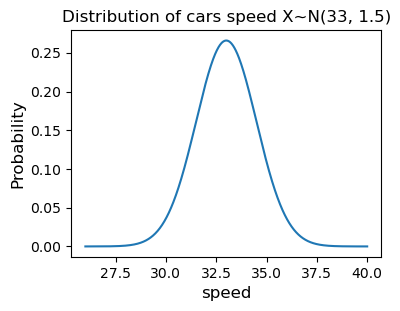

In [2]:
mu = 33
sd = 1.5

xx = np.linspace(26, 40, 1000)
pdf = stats.norm.pdf(xx, loc=mu, scale=sd)

plt.figure(figsize=(4,3), dpi=100)
ax = sns.lineplot(x=xx, y=pdf)
plt.title('Distribution of cars speed X~N(33, 1.5)', fontsize='large')
ax.set_xlabel("speed", fontsize='large')
ax.set_ylabel("Probability", fontsize='large')

**TA2) Following from TA1, use the PDF definition of the normal distribution to construct and visualise the PDF. What do you expect?**

Text(0, 0.5, 'Probability')

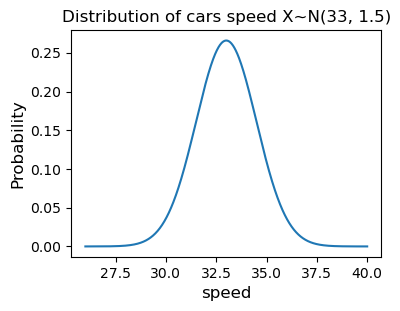

In [3]:
def normDist (mu, sd, xx):
  v = [1/(sd*m.sqrt(2*m.pi))*m.pow(m.e,-m.pow((i-mu),2)/(2*m.pow(sd,2))) for i in xx]
  return v

pdf = normDist(mu, sd, xx)

plt.figure(figsize=(4,3), dpi=100)
ax = sns.lineplot(x=xx, y=pdf)
plt.title('Distribution of cars speed X~N(33, 1.5)', fontsize='large')
ax.set_xlabel("speed", fontsize='large')
ax.set_ylabel("Probability", fontsize='large')

**TA3) What is the probability that a car picked at random is travelling at more than 34 m/hr?**

In [4]:
overspeedProb = 1-stats.norm.cdf(x=34, loc=mu, scale=sd)
print(overspeedProb)

0.2524925375469229


**TA4) Visualise the cumulative distribution function for this problem $𝑋∼𝑁(33,1.5)$ and shade the area that corresponds to the answer from task TA3**

**Hint**: You may want to check: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


* To construct the CDF you can either generate the values for a desired x range or construct the CDF empirically through sampling from the distribution
* To shade the area you may want to check https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between 

Text(0, 0.5, 'Cumulative Probability')

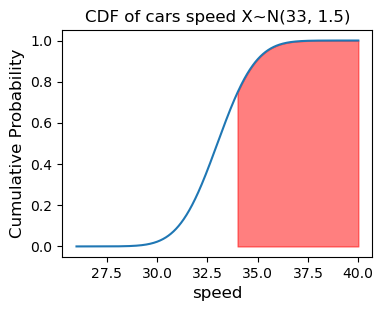

In [5]:
cdf = stats.norm.cdf(loc=mu, scale=sd, x=xx)

plt.figure(figsize=(4,3), dpi=100)
ax = sns.lineplot(x=xx, y=cdf)

y = ax.lines[-1].get_ydata()
ax.fill_between(xx, 0, y, where=(xx>=34),  color='r', alpha=0.5)

plt.title('CDF of cars speed X~N(33, 1.5)', fontsize='large')
ax.set_xlabel("speed", fontsize='large')
ax.set_ylabel("Cumulative Probability", fontsize='large')

**TA5) Generate 2000 samples from the distribution $𝑋∼𝑁(33,1.5)$**


In [6]:
l  = 2000

xxS = np.random.normal(loc=mu, scale=sd, size=l)

print(np.mean(xxS), np.std(xxS))

32.98154399363903 1.51427808109409


**TA6) Transform the samples from task TA5 into the standard normal distribution and visualise it**

* **Compare its shape with those derived in tasks TA1 and TA2**


In [ ]:
#Write your answer here


**TA7) Find the z scores for x=34 and x=30 and explain their meaning.**


In [ ]:
#Write your answer here


**The final exam scores in the Machine Learning 101 module were normally distributed with a mean of 63 and a standard deviation of 5.**

**TA8i)  What is the probability that a randomly selected student scored more than 45 on the exam? You must show your calculations and you may use the Z table at** http://www.z-table.com

In [ ]:
#Write your answer here


**TA8ii) What is the probability of randomly selecting a student with score less than 85?**


In [ ]:
#Write your answer here


**The average number of hours a household personal computer is used for entertainment is two hours per day. Assume the times for entertainment are normally distributed and the standard deviation for the times is half an hour.**

**TA9i) Find the probability that a household personal computer is used for entertainment between 1.8 and 2.75 hours per day.**

In [ ]:
#Write your answer here


**TA9ii) Find the maximum number of hours per day that the lower quartile of households uses a personal computer for entertainment.**

In [ ]:
#Write your answer here


**A citrus farmer who grows oranges finds that the diameters of mandarin oranges harvested on his farm follow a normal distribution with a mean diameter of 5.85 cm and a standard deviation of 0.24 cm.**

**TA10i) Find the probability that a randomly selected orange from this farm has a diameter larger than 6.0 cm. Also, plot the density curve with the area covered by the probability shaded.**

* Hint: You might want to check how to draw random samples using numpy https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
* Hint: The following code snippet might be useful

```python
ax = sns.kdeplot(dist, shade=True)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = x > 0
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='red')
```


In [ ]:
#Write your answer here


**TA10ii) Calculate the middle 20% of oranges from the farm. Also, plot the density curve with the area covered by the probability shaded.**

In [ ]:
#Write your answer here


--- 



## **Part B': Exponential Distribution**

Nisa store at the University of York has recently installed self-checkout machines and the Nisa store manager wants to investigate the time spent by students waiting to be serviced. The manager expects that most students should be able to check out immediately with fewer students waiting for a successive time. 

He consults a statistician, whose advice was to model the waiting time at the store using an **exponential distribution** which enables to model the amount of waiting time until the next event with its formula given by $f(x;\lambda) = \lambda e ^{-\lambda x}$, if $x \geq 0$, where $\lambda$ is the average rate of occurence per interval. For instance, if $u$ customers are serviced per hour the rate $\lambda = u$.

Based on some preliminary analysis of the log of the self-checkout machines, the manager has found that on average each machine services **15 customers per hour, i.e., $\lambda=15$**.

---

**TB1)  Generate 10000 samples following the exponential distribution with $\lambda=15$. Store this data in a list.**

* **Hint**: You may want to look at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html or https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

* **Check what information is required to model this event?#**


In [ ]:
#Write your answer here


**TB2)  Print the mean of the generated data that is saved on the list.**


In [ ]:
#Write your answer here


**TB3)  Plot the histogram of the generated data and the density plot. What is the shape of the distribution? Can you understand what it represents?**

* **Note**: Spend some time to try and understand the distribution


In [ ]:
#Write your answer here


**TB4) Plot again the density curve from the previous task. On the sample plot try to plot the curve as given by the definition of the exponential distribution. What do you expect the relationship between these two plot to be?**

* **Hint**: Check the definition of the exponential distribution. What do you need to plot it?
* **Hint**: Check the range of the values on the X axis

In [ ]:
#Write your answer here


**TB5i) Calculate the probability that a customer will be serviced within 6 minutes**

In [ ]:
#Write your answer here


**TB5ii) Calculate the probability that a customer may have to wait more than 10 minutes to be serviced**

In [ ]:
#Write your answer here


#### **TB6) Brain Teaser**

**TB6i) Using the data generated in TB1, (i) generate and plot the density distribution of sample means over $k=20$ sampling times with $n=5$ (the sampling size).**

* **Hint**:  "Distribution of Sample Means": Sample n items from a population (or a set), find the mean of those items and repeat k times
* **Hint**: You might want to check how to select randomly from a set using Numpy

In [ ]:
#Write your answer here


**TB6ii) Repeat task TB6i with $n \in \{5, 20, 40\}$. What do you observe as $n$ increases? Does the distribution of sample means look familiar?**

In [ ]:
#Write your answer here


**TB6iii) Repeat task TB6i with  $n=50$ and $k \in \{5, 20,50\}$. What do you observe as $k$ increases? Does the distribution of sample means look familiar?**

In [ ]:
#Write your answer here


##### **The Cental Limit Theorem**

What you have observed in task TB6 is due to the **central limit theorem** which states that, given a sufficiently large sample size, the sampling distribution of the mean for a random variable will approximate a normal distribution regardless of the variable's distribution in the population. 

Consider the distribution from which you sampled the data!

This is a fundamental principle that enables to use the inferential statistical techniques we will see next week. You can read more about the central limit theorem at https://en.wikipedia.org/wiki/Central_limit_theorem


---

## **Part C: Correlation & Covariance**

**TC1) A casino has collected data about the hours some of its members spent on a weekly basis and the amount of money they bet. The casino wants to check whether there is a correlation between the time and money spent**

**Implement the Pearson colleration metric to investigate whether there is any correlation between these variables. Do the same for the Spearman colleration metric. Once you finish the implementation you can check their correctness using the built-in functions of the Scipy library**


**What do the correlation results tell us?**

In [ ]:
time   = [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2]
money  = [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]

In [ ]:
#Write your answer here


**TC2) Assume that the following entry is added to the time and money lists: (50h, £550). Add this entry to the corresponding lists and calculate again the Pearson r and Spearman rho correlation metrics (now using the corresponding library function directly (e.g., Scipy)**

**What do you observe?**

In [ ]:
#Write your answer here
